In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.shape

(907, 27)

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
c1 = ['country','country_long','name','capacity_mw','primary_fuel','other_fuel1','other_fuel2','other_fuel3','commissioning_year',
    'year_of_capacity_data', 'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
    'estimated_generation_gwh'
]

In [8]:
df1 = df[c1].copy()


In [9]:
df1.shape

(907, 16)

In [10]:
df1.head()

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,IND,India,ACME Solar Tower,2.5,Solar,NaN,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,135.0,Gas,NaN,NaN,NaN,2004.0,2019.0,NaN,617.789264,843.747,886.004428,663.774500,NaN
4,IND,India,AKALTARA TPP,1800.0,Coal,Oil,NaN,NaN,2015.0,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,NaN


In [11]:
df1.describe()

,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,907.000000,0.0,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,0.0
mean,326.223755,NaN,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN
std,590.085456,NaN,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,NaN
min,0.000000,NaN,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,NaN,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,NaN
50%,59.200000,NaN,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,NaN
75%,385.250000,NaN,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,NaN
max,4760.000000,NaN,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [13]:
df1.country_long.nunique()


1

In [14]:
main_primary_fuel = df1.primary_fuel.value_counts() * 100 / df1.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

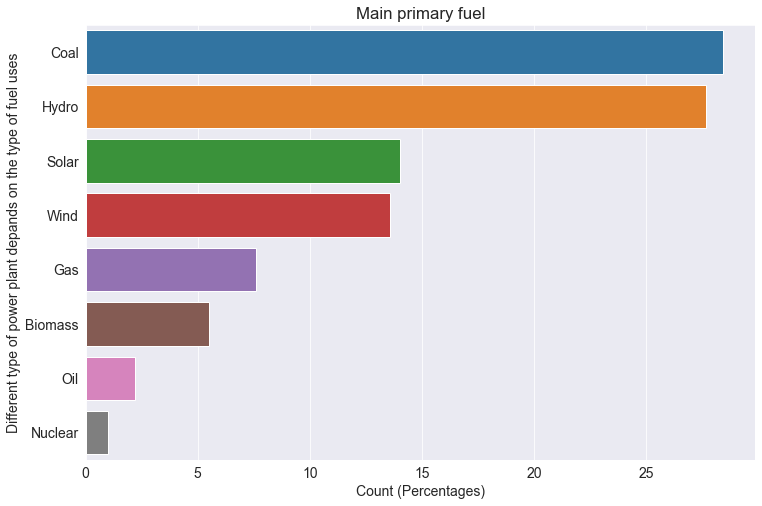

In [15]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

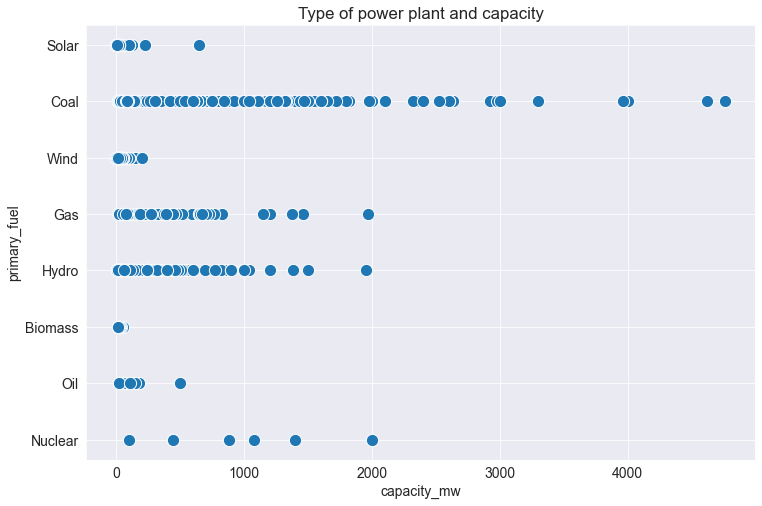

In [16]:
sns.scatterplot(x = df1.capacity_mw, y = df1.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [17]:
df1.generation_gwh_2013.isna().sum()


907

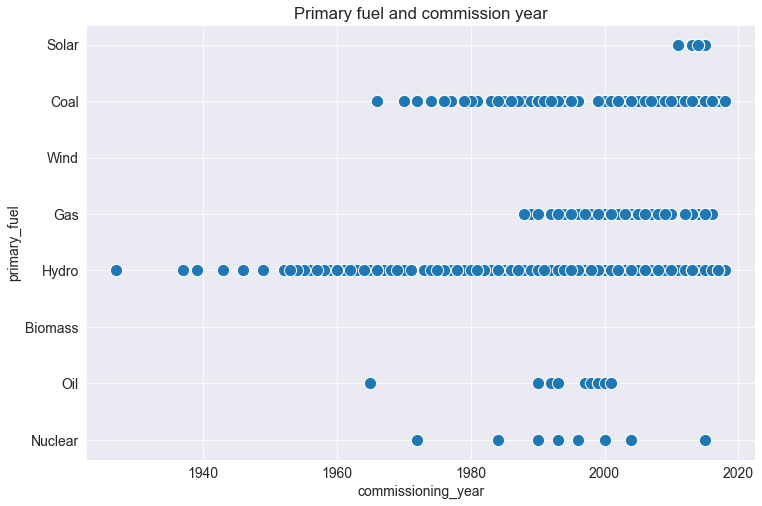

In [18]:
sns.scatterplot(x = df1.commissioning_year, y = df1.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

In [20]:
fosil_fuel = df1[df1.primary_fuel.isin(['Gas', 'Oil', 'Coal', 'Nuclear', 'Petcoke', 'Cogeneration'])]
number_of_fosil_fuel_plant = fosil_fuel.country_long.value_counts().head(30)
number_of_fosil_fuel_plant


India    356
Name: country_long, dtype: int64

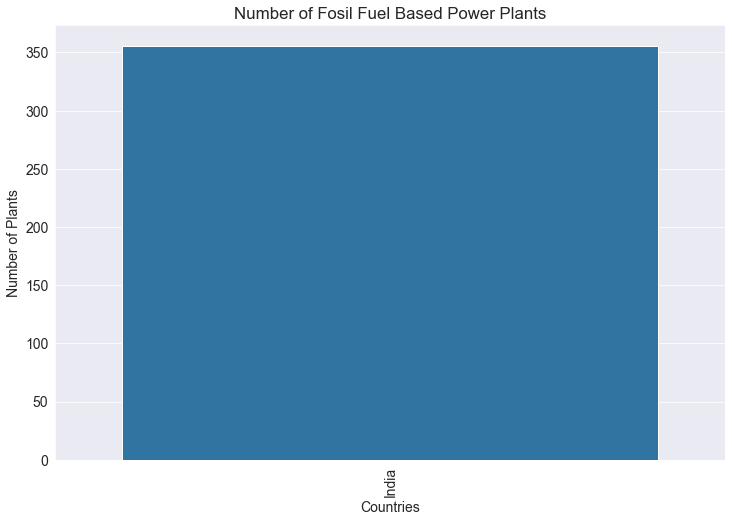

In [21]:
sns.barplot(x = number_of_fosil_fuel_plant.index, y = number_of_fosil_fuel_plant)
plt.xticks(rotation = 90)
plt.title('Number of Fosil Fuel Based Power Plants')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [24]:
nuclear_plant = df1[df1.primary_fuel.isin(['Nuclear'])]
number_of_nuclear_plant = nuclear_plant.country_long.value_counts().head(2)
number_of_nuclear_plant


India    9
Name: country_long, dtype: int64

Text(0.5, 0, 'Countries')

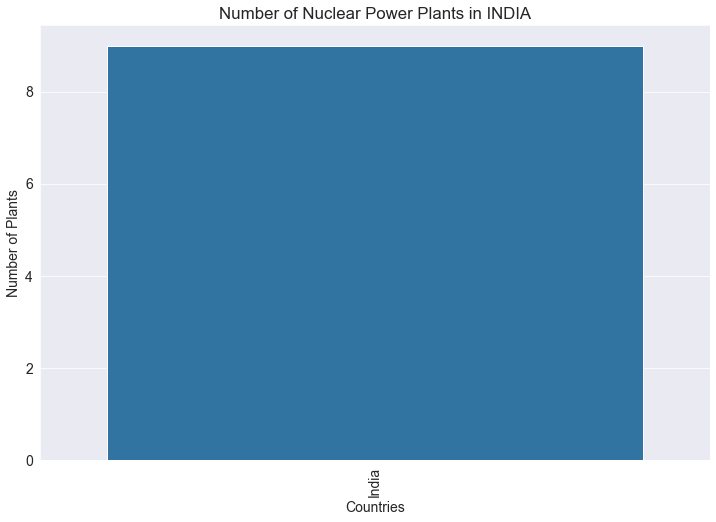

In [23]:
sns.barplot(x = number_of_nuclear_plant.index, y = number_of_nuclear_plant)
plt.xticks(rotation = 90)
plt.title('Number of Nuclear Power Plants in INDIA')
plt.ylabel('Number of Plants')
plt.xlabel('Countries')

<AxesSubplot:>

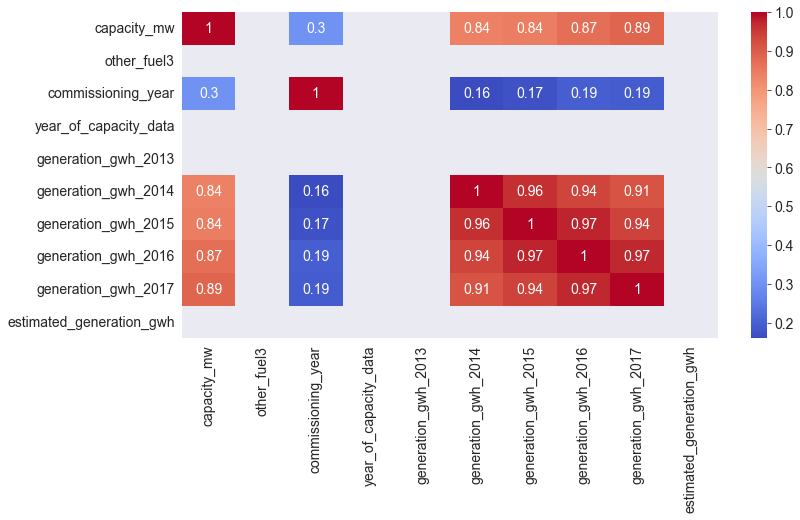

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   capacity_mw               907 non-null    float64
 4   primary_fuel              907 non-null    object 
 5   other_fuel1               198 non-null    object 
 6   other_fuel2               1 non-null      object 
 7   other_fuel3               0 non-null      float64
 8   commissioning_year        527 non-null    float64
 9   year_of_capacity_data     519 non-null    float64
 10  generation_gwh_2013       0 non-null      float64
 11  generation_gwh_2014       398 non-null    float64
 12  generation_gwh_2015       422 non-null    float64
 13  generation_gwh_2016       434 non-null    float64
 14  generation

In [27]:
for i in df1.columns:
    print(df1[i].nunique())
    print(i)
    print('\n')

1
country


1
country_long


907
name


361
capacity_mw


8
primary_fuel


3
other_fuel1


1
other_fuel2


0
other_fuel3


73
commissioning_year


1
year_of_capacity_data


0
generation_gwh_2013


371
generation_gwh_2014


396
generation_gwh_2015


403
generation_gwh_2016


408
generation_gwh_2017


0
estimated_generation_gwh




In [28]:
df1.nunique()

country                       1
country_long                  1
name                        907
capacity_mw                 361
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
estimated_generation_gwh      0
dtype: int64

In [29]:
df1.replace(np.nan,'',regex=True) #replace Nan inplace of empty string

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,IND,India,ACME Solar Tower,2.5,Solar,,,,2011.0,,,,,,,
1,IND,India,ADITYA CEMENT WORKS,98.0,Coal,,,,,,,,,,,
2,IND,India,AES Saurashtra Windfarms,39.2,Wind,,,,,,,,,,,
3,IND,India,AGARTALA GT,135.0,Gas,,,,2004.0,2019.0,,617.789264,843.747,886.004428,663.7745,
4,IND,India,AKALTARA TPP,1800.0,Coal,Oil,,,2015.0,2019.0,,3035.55,5916.37,6243.0,5385.579736,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,1600.0,Coal,Oil,,,2016.0,2019.0,,,0.994875,233.59665,865.4,
903,IND,India,Yelesandra Solar Power Plant,3.0,Solar,,,,,,,,,,,
904,IND,India,Yelisirur wind power project,25.5,Wind,,,,,,,,,,,
905,IND,India,ZAWAR MINES,80.0,Coal,,,,,,,,,,,


In [30]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
capacity_mw                   0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
estimated_generation_gwh    907
dtype: int64

In [31]:
df1.shape

(907, 16)

In [32]:
df1.corr()

,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
capacity_mw,1.000000,NaN,0.304087,NaN,NaN,0.839094,0.844352,0.870620,0.886673,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.304087,NaN,1.000000,NaN,NaN,0.160014,0.170363,0.193743,0.191367,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,NaN,0.160014,NaN,NaN,1.000000,0.961098,0.937060,0.912561,NaN
generation_gwh_2015,0.844352,NaN,0.170363,NaN,NaN,0.961098,1.000000,0.974918,0.940191,NaN
generation_gwh_2016,0.870620,NaN,0.193743,NaN,NaN,0.937060,0.974918,1.000000,0.972024,NaN
generation_gwh_2017,0.886673,NaN,0.191367,NaN,NaN,0.912561,0.940191,0.972024,1.000000,NaN
estimated_generation_gwh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

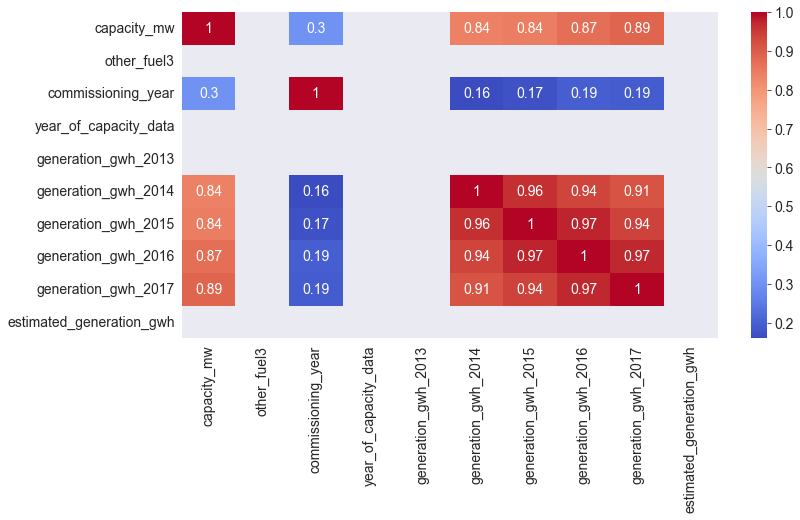

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)